## K-means clustering

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into *k* distinct, non-overlapping subgroups or "clusters". The goal is to group data points such that those within the same cluster are similar to each other, while those in different clusters are dissimilar.

## How K-Means Works

The algorithm follows an iterative process:

1.  **Initialization:** Choose *k* initial centroids, which are randomly selected data points or points strategically placed in the data space.
2.  **Assignment:** Each data point is assigned to the nearest centroid based on a distance metric (commonly Euclidean distance). This forms *k* initial clusters.
3.  **Update:** The centroids of each cluster are recalculated as the mean of all data points assigned to that cluster.
4.  **Iteration:** Steps 2 and 3 are repeated until the centroids no longer change significantly or a maximum number of iterations is reached. This indicates that the clusters have stabilized.

## Applications of K-Means Clustering

K-means is a versatile algorithm with numerous applications across various domains:

*   **Customer Segmentation:** Grouping customers based on purchasing behavior, demographics, or other characteristics for targeted marketing.
*   **Image Compression:** Reducing the number of colors in an image by grouping similar colors into clusters and representing each cluster by its centroid color.
*   **Anomaly Detection:** Identifying unusual data points that do not fit into any of the established clusters.
*   **Document Analysis:** Clustering documents based on their content to discover topics or themes.
*   **Genomic Analysis:** Grouping genes with similar expression patterns.

## Load and explore datasets

In [1]:
from sklearn.datasets import load_digits, load_breast_cancer
import pandas as pd

# Load the digits dataset
digits = load_digits()
digits_df = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
digits_df['target'] = digits.target

print("Digits Dataset:")
display(digits_df.head())
print("\nDigits Dataset Info:")
digits_df.info()
print("\nDigits Dataset Missing Values:")
print(digits_df.isnull().sum().sum())

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target

print("\nBreast Cancer Dataset:")
display(breast_cancer_df.head())
print("\nBreast Cancer Dataset Info:")
breast_cancer_df.info()
print("\nBreast Cancer Dataset Missing Values:")
print(breast_cancer_df.isnull().sum().sum())

Digits Dataset:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4



Digits Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Breast Cancer Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 1

## Digits Dataset

The Digits dataset is a collection of handwritten digits images, originally from the UCI Machine Learning Repository. It is a widely used dataset for classification and clustering tasks.

*   **Source:** UCI Machine Learning Repository (often included with scikit-learn)
*   **Number of Features:** 64
*   **Feature Representation:** Each feature represents the intensity of a pixel in an 8x8 grayscale image of a handwritten digit. The pixel intensity values range from 0 to 16.

## Breast Cancer Wisconsin (Diagnostic) Dataset

The Breast Cancer Wisconsin (Diagnostic) dataset contains features computed from digitized images of fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image.

*   **Source:** UCI Machine Learning Repository (often included with scikit-learn)
*   **Number of Features:** 30
*   **Feature Representation:** The features represent various measurements of cell nuclei, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. For each of these characteristics, the mean, standard error, and "worst" (mean of the three largest values) are computed, resulting in 30 features. The target variable indicates whether the tumor is malignant (0) or benign (1).

## Data preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y) for digits_df
X_digits = digits_df.drop('target', axis=1)
y_digits = digits_df['target']

# Separate features (X) and target (y) for breast_cancer_df
X_breast_cancer = breast_cancer_df.drop('target', axis=1)
y_breast_cancer = breast_cancer_df['target']

# Scale the feature data for digits_df
scaler_digits = StandardScaler()
X_digits_scaled = scaler_digits.fit_transform(X_digits)

# Scale the feature data for breast_cancer_df
scaler_breast_cancer = StandardScaler()
X_breast_cancer_scaled = scaler_breast_cancer.fit_transform(X_breast_cancer)

print("Scaled Digits Features (first 5 rows):")
display(pd.DataFrame(X_digits_scaled, columns=X_digits.columns).head())

print("\nScaled Breast Cancer Features (first 5 rows):")
display(pd.DataFrame(X_breast_cancer_scaled, columns=X_breast_cancer.columns).head())

Scaled Digits Features (first 5 rows):


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008



Scaled Breast Cancer Features (first 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Implement k-means clustering

In [3]:
from sklearn.cluster import KMeans

# Instantiate and fit KMeans for scaled digits data
kmeans_digits = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_digits.fit(X_digits_scaled)

# Instantiate and fit KMeans for scaled breast cancer data
kmeans_breast_cancer = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_breast_cancer.fit(X_breast_cancer_scaled)

# Store cluster labels
digits_cluster_labels = kmeans_digits.labels_
breast_cancer_cluster_labels = kmeans_breast_cancer.labels_

print("Digits Cluster Labels (first 10):")
print(digits_cluster_labels[:10])

print("\nBreast Cancer Cluster Labels (first 10):")
print(breast_cancer_cluster_labels[:10])

Digits Cluster Labels (first 10):
[2 0 0 8 4 8 5 7 8 8]

Breast Cancer Cluster Labels (first 10):
[1 1 1 1 1 1 1 1 1 1]


## Determine optimal number of clusters

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate inertia for scaled digits data (Elbow Method)
inertia = []
k_range_digits = range(1, 21)
for k in k_range_digits:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_digits_scaled)
    inertia.append(kmeans.inertia_)

# Calculate silhouette scores for scaled breast cancer data
silhouette_scores = []
k_range_breast_cancer = range(2, 11)
for k in k_range_breast_cancer:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_breast_cancer_scaled)
    score = silhouette_score(X_breast_cancer_scaled, kmeans.labels_)
    silhouette_scores.append(score)

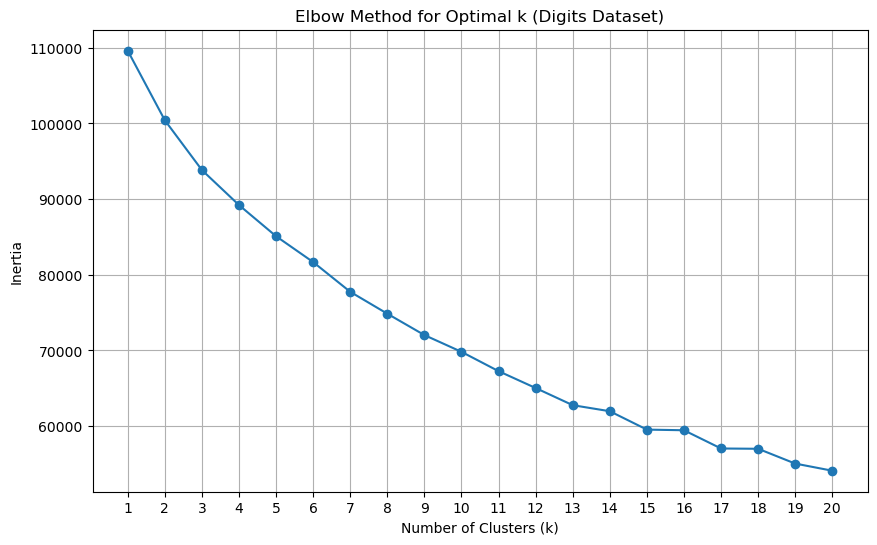

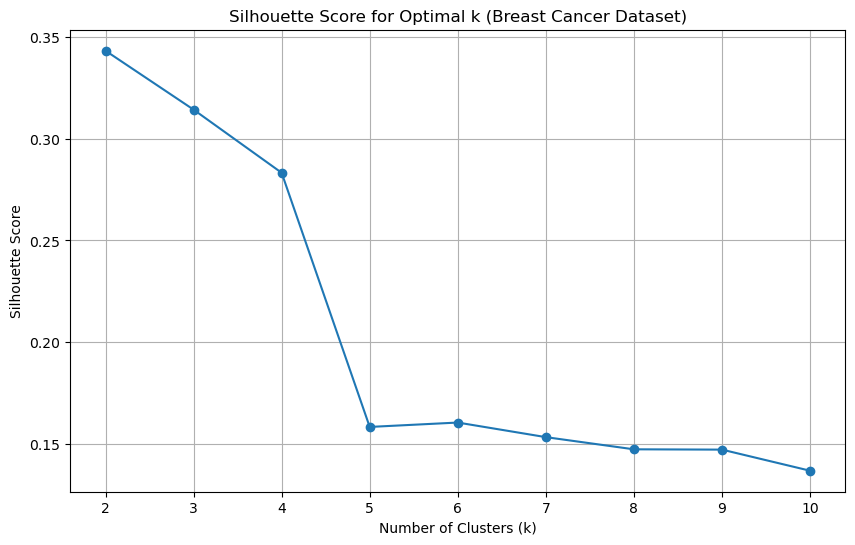

In [5]:
# Generate elbow plot for digits data
plt.figure(figsize=(10, 6))
plt.plot(k_range_digits, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Digits Dataset)')
plt.xticks(k_range_digits)
plt.grid(True)
plt.show()

# Generate silhouette plot for breast cancer data
plt.figure(figsize=(10, 6))
plt.plot(k_range_breast_cancer, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (Breast Cancer Dataset)')
plt.xticks(k_range_breast_cancer)
plt.grid(True)
plt.show()

## Evaluate clustering performance

In [6]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

In [7]:
# Calculate and print metrics for the digits dataset
homogeneity = homogeneity_score(y_digits, digits_cluster_labels)
completeness = completeness_score(y_digits, digits_cluster_labels)
v_measure = v_measure_score(y_digits, digits_cluster_labels)

print(f"Digits Dataset Clustering Metrics:")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")

# Calculate and print metrics for the breast cancer dataset
adjusted_rand = adjusted_rand_score(y_breast_cancer, breast_cancer_cluster_labels)
adjusted_mutual_info = adjusted_mutual_info_score(y_breast_cancer, breast_cancer_cluster_labels)

print(f"\nBreast Cancer Dataset Clustering Metrics:")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info:.4f}")

Digits Dataset Clustering Metrics:
Homogeneity: 0.6498
Completeness: 0.6941
V-measure: 0.6712

Breast Cancer Dataset Clustering Metrics:
Adjusted Rand Index: 0.6536
Adjusted Mutual Information: 0.5318


## Feature importance

In [8]:
import numpy as np

# Calculate centroids for digits
digits_centroids = kmeans_digits.cluster_centers_

# Calculate mean feature values for each pixel within each cluster for digits
digits_cluster_means = pd.DataFrame(X_digits_scaled).groupby(digits_cluster_labels).mean()

# Reshape mean pixel values for visualization (optional, for later use)
# This is a list of arrays, where each array is an 8x8 image
digits_mean_images = [mean_values.reshape(8, 8) for mean_values in digits_cluster_means.values]

# Calculate mean and standard deviation for each feature for each cluster for breast cancer
breast_cancer_cluster_summary = pd.DataFrame(X_breast_cancer_scaled, columns=X_breast_cancer.columns).groupby(breast_cancer_cluster_labels).agg(['mean', 'std'])

print("Digits Cluster Centroids (first 5 rows, first 5 columns):")
display(pd.DataFrame(digits_centroids).head())

print("\nDigits Cluster Mean Feature Values (first 5 clusters, first 5 pixels):")
display(digits_cluster_means.head())

print("\nBreast Cancer Cluster Summary (Mean and Std Dev per feature per cluster):")
display(breast_cancer_cluster_summary)

Digits Cluster Centroids (first 5 rows, first 5 columns):


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.285512,-0.339318,-0.016124,0.225899,-0.026339,-0.269776,-0.125023,-0.059078,-0.382581,...,-0.583980,-0.205638,0.149476,-0.237903,-0.346919,-0.013826,0.218261,-0.225008,-0.276107,-0.191618
1,0.0,0.894817,0.993941,0.340473,0.508041,1.179147,0.928297,-0.087937,0.281186,0.858550,...,-0.689658,-0.209785,-0.023596,0.826438,1.047956,0.545406,-0.781336,-0.953220,-0.504102,-0.196008
2,0.0,-0.310099,-0.201157,0.308654,-0.145138,-0.507032,-0.399528,-0.125023,-0.059078,-0.344642,...,-0.264611,-0.209785,-0.023596,-0.293033,-0.265447,0.345225,0.311299,-0.221466,-0.437974,-0.196008
3,0.0,-0.272898,0.413217,0.473021,-1.029225,-0.836670,-0.409724,-0.125023,-0.059078,-0.042163,...,1.095473,3.024654,-0.023596,-0.284002,0.186108,0.504573,0.401333,1.243357,2.972914,4.265036
4,0.0,-0.335016,-1.062293,-1.607289,-0.064114,-0.039864,0.024571,-0.095930,-0.059078,-0.619962,...,-0.654893,-0.209785,-0.023596,-0.280622,-1.053052,-1.500677,0.055300,-0.323887,-0.366538,-0.196008



Digits Cluster Mean Feature Values (first 5 clusters, first 5 pixels):


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.285512,-0.339318,-0.016124,0.225899,-0.026339,-0.269776,-0.125023,-0.059078,-0.382581,...,-0.583980,-0.205638,0.149476,-0.237903,-0.346919,-0.013826,0.218261,-0.225008,-0.276107,-0.191618
1,0.0,0.894817,0.993941,0.340473,0.508041,1.179147,0.928297,-0.087937,0.281186,0.858550,...,-0.689658,-0.209785,-0.023596,0.826438,1.047956,0.545406,-0.781336,-0.953220,-0.504102,-0.196008
2,0.0,-0.310099,-0.201157,0.308654,-0.145138,-0.507032,-0.399528,-0.125023,-0.059078,-0.344642,...,-0.264611,-0.209785,-0.023596,-0.293033,-0.265447,0.345225,0.311299,-0.221466,-0.437974,-0.196008
3,0.0,-0.272898,0.413217,0.473021,-1.029225,-0.836670,-0.409724,-0.125023,-0.059078,-0.042163,...,1.095473,3.024654,-0.023596,-0.284002,0.186108,0.504573,0.401333,1.243357,2.972914,4.265036
4,0.0,-0.335016,-1.062293,-1.607289,-0.064114,-0.039864,0.024571,-0.095930,-0.059078,-0.619962,...,-0.654893,-0.209785,-0.023596,-0.280622,-1.053052,-1.500677,0.055300,-0.323887,-0.366538,-0.196008



Breast Cancer Cluster Summary (Mean and Std Dev per feature per cluster):


mean radius           mean texture           mean perimeter            \
         mean       std         mean       std           mean       std   
0   -0.482995  0.555954    -0.239041  0.942655      -0.500419  0.532222   
1    0.933624  1.009848     0.462065  0.949002       0.967305  0.985995   

  mean area           mean smoothness            ... worst compactness  \
       mean       std            mean       std  ...              mean   
0 -0.478142  0.441603       -0.311004  0.893759  ...         -0.492241   
1  0.924243  1.125800        0.601167  0.921430  ...          0.951497   

            worst concavity           worst concave points            \
        std            mean       std                 mean       std   
0  0.515378       -0.536843  0.518964            -0.580101  0.568393   
1  1.025984        1.037713  0.885372             1.121329  0.635912   

  worst symmetry           worst fractal dimension            
            mean       std                    mean       std  
0      -0.303355  0.712286               -0.336729  0.656134  
1       0.586382  1.200250                0.650893  1.211513  

[2 rows x 60 columns]

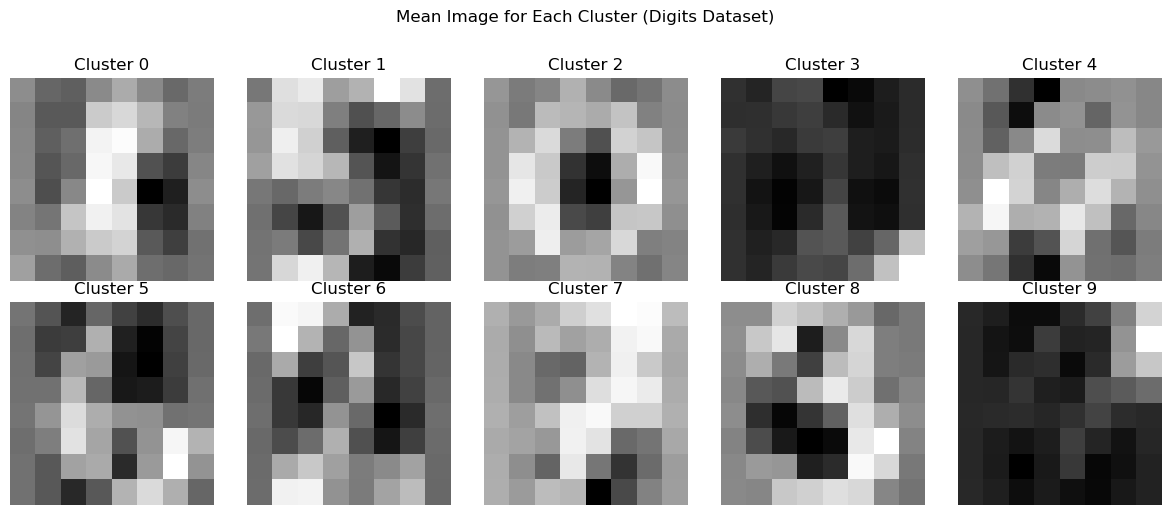


Features sorted by absolute difference in mean across clusters (Breast Cancer):
mean concave points      mean    1.722167
worst concave points     mean    1.701430
mean concavity           mean    1.698306
worst concavity          mean    1.574556
worst perimeter          mean    1.561264
mean compactness         mean    1.542808
worst radius             mean    1.518860
mean perimeter           mean    1.467724
worst area               mean    1.464611
worst compactness        mean    1.443738
mean radius              mean    1.416619
mean area                mean    1.402384
perimeter error          mean    1.264036
radius error             mean    1.255276
area error               mean    1.178333
concave points error     mean    1.166486
compactness error        mean    1.085794
worst fractal dimension  mean    0.987622
concavity error          mean    0.981371
worst smoothness         mean    0.927054
mean smoothness          mean    0.912170
mean symmetry            mean    0.90

In [9]:
# Visualize mean digit images for each cluster
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits_mean_images[i], cmap='gray')
    ax.set_title(f'Cluster {i}')
    ax.axis('off')
plt.suptitle('Mean Image for Each Cluster (Digits Dataset)', y=1.02)
plt.tight_layout()
plt.show()

# Analyze the distribution of feature values within each cluster for breast cancer
# We already have the mean and std dev summary in breast_cancer_cluster_summary
# Let's calculate the difference in means between the two clusters for each feature
mean_diff = breast_cancer_cluster_summary.loc[0, (slice(None), 'mean')] - breast_cancer_cluster_summary.loc[1, (slice(None), 'mean')]

# Sort features by the absolute difference in means
sorted_mean_diff = mean_diff.abs().sort_values(ascending=False)

print("\nFeatures sorted by absolute difference in mean across clusters (Breast Cancer):")
print(sorted_mean_diff)

# Interpretation: Features with larger absolute differences in means across clusters are more important in distinguishing between the two clusters.

## Hyperparameter tuning

## Hyperparameter Tuning for K-Means Clustering

Hyperparameter tuning is a crucial step in optimizing the performance of machine learning algorithms, and k-means clustering is no exception. Hyperparameters are parameters that are set *before* the learning process begins, as opposed to model parameters which are learned from the data. Tuning these hyperparameters helps to find the best configuration for a given dataset and clustering objective.

The main hyperparameters of the KMeans algorithm in scikit-learn include:

*   `n_clusters`: The most critical hyperparameter, representing the number of clusters to form.
*   `init`: The method for initializing the centroids.
*   `n_init`: The number of times the k-means algorithm will be run with different centroid seeds.

### Tuning `n_clusters`

Determining the optimal number of clusters (`n_clusters`) is a key aspect of tuning k-means. As demonstrated in a previous step, methods like the **Elbow Method** and the **Silhouette Score** are commonly used for this purpose.

*   The **Elbow Method** plots the inertia (within-cluster sum of squares) against the number of clusters. The "elbow point" in the plot, where the rate of decrease in inertia slows down significantly, is often considered an indicator of the optimal number of clusters.
*   The **Silhouette Score** measures how similar a data point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined and well-separated clusters. By calculating the silhouette score for different values of `n_clusters`, we can choose the number that yields the highest score.

Both of these methods are essentially forms of hyperparameter tuning for `n_clusters`, allowing us to explore different values and evaluate their impact on the clustering structure.

### Understanding `init`

The `init` parameter controls the method used to place the initial centroids. The choice of initialization method can significantly impact the final clustering result, as k-means can converge to different local optima depending on the starting positions of the centroids.

*   `'k-means++'`: This is the default and generally recommended initialization method. It smartly selects initial centroids that are far away from each other, which tends to lead to better and more consistent results than random initialization.
*   `'random'`: This method chooses `n_clusters` observations randomly from the data for the initial centroids. This method is more susceptible to converging to suboptimal solutions.

### The Importance of `n_init`

The `n_init` parameter specifies the number of times the k-means algorithm will be run with different initial centroids. For each run, a different random seed is used for centroid initialization (unless `init` is a callable). The final result is the best output of `n_init` consecutive runs in terms of inertia.

Running the algorithm multiple times with different initializations is important because:

*   K-means is not guaranteed to find the global minimum of the inertia. It can get stuck in local minima.
*   By running multiple times with different starting points, we increase the chances of finding a better, potentially the global, optimum.

In our previous implementation of k-means, we set `n_init=10`. This means the algorithm was run 10 different times with different random initializations, and the best result (lowest inertia) among these 10 runs was chosen as the final model. This helps to mitigate the sensitivity of k-means to the initial centroid placement.

### Other Considerations

Other hyperparameters and considerations for tuning KMeans include:

*   `max_iter`: The maximum number of iterations for the algorithm to run for a single initialization. If the centroids converge before this, the algorithm stops.
*   `tol`: The tolerance for declaring convergence. The algorithm stops when the change in inertia is below this threshold.

Tuning these parameters can further refine the clustering process, although `n_clusters`, `init`, and `n_init` are typically the most impactful for the quality and robustness of the final clusters.

### Conclusion on Hyperparameter Tuning

Hyperparameter tuning is essential for obtaining meaningful and robust clustering results with KMeans. While methods like the Elbow method and Silhouette score help determine the optimal `n_clusters`, understanding and appropriately setting parameters like `init` and `n_init` are equally important. By running the algorithm multiple times with a smart initialization strategy, we increase the reliability of the clustering outcome and reduce the risk of converging to a poor local optimum. Effective tuning ensures that the k-means model captures the underlying structure of the data as accurately as possible.

## Validation and interpretation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# 1. Validate Digits Clustering
print("Validating Digits Clustering:")
# Create a confusion matrix (cross-tabulation)
confusion_matrix_digits = pd.crosstab(y_digits, digits_cluster_labels)
print("Confusion Matrix (True Digits vs. Cluster Labels):")
display(confusion_matrix_digits)

# Map cluster labels to true labels for accuracy calculation
# We need to find the best mapping between cluster labels and true digit labels.
# This can be done by finding the assignment that maximizes the sum of the confusion matrix diagonal.
# We can use the Hungarian algorithm (linear_sum_assignment) for this.

# Create a cost matrix (negative of the confusion matrix) for the Hungarian algorithm
cost_matrix = -confusion_matrix_digits.values

# Find the optimal assignment of cluster labels to true labels
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# The matched labels are row_ind (true labels) and col_ind (cluster labels)
# Create a mapping from cluster label to true label
cluster_to_digit_mapping = {cluster_label: true_label for cluster_label, true_label in zip(col_ind, row_ind)}
print("\nOptimal Cluster to Digit Mapping:")
print(cluster_to_digit_mapping)

# Map the predicted cluster labels to the assigned true labels
mapped_digits_labels = np.array([cluster_to_digit_mapping[label] for label in digits_cluster_labels])

# Calculate "accuracy" based on the best mapping
accuracy_digits = accuracy_score(y_digits, mapped_digits_labels)
print(f"\n'Accuracy' of Digits Clustering (with optimal mapping): {accuracy_digits:.4f}")


# 2. Validate Breast Cancer Clustering
print("\n" + "="*30)
print("Validating Breast Cancer Clustering:")
# Create a confusion matrix (cross-tabulation)
confusion_matrix_breast_cancer = pd.crosstab(y_breast_cancer, breast_cancer_cluster_labels)
print("Confusion Matrix (True Diagnosis vs. Cluster Labels):")
display(confusion_matrix_breast_cancer)

# Map cluster labels to true labels for accuracy calculation
# Assuming 2 clusters correspond to 2 classes (0 and 1).
# We can determine the mapping by seeing which cluster label has more samples from class 0, and which has more from class 1.
# Or use the Hungarian algorithm again for robustness.

# Create a cost matrix for the Hungarian algorithm (2x2)
cost_matrix_bc = -confusion_matrix_breast_cancer.values

# Find the optimal assignment
row_ind_bc, col_ind_bc = linear_sum_assignment(cost_matrix_bc)

# Create mapping from cluster label to true label (0 or 1)
cluster_to_diagnosis_mapping = {cluster_label: true_label for cluster_label, true_label in zip(col_ind_bc, row_ind_bc)}
print("\nOptimal Cluster to Diagnosis Mapping:")
print(cluster_to_diagnosis_mapping)

# Map the predicted cluster labels to the assigned true labels
mapped_breast_cancer_labels = np.array([cluster_to_diagnosis_mapping[label] for label in breast_cancer_cluster_labels])

# Calculate "accuracy" based on the best mapping
accuracy_breast_cancer = accuracy_score(y_breast_cancer, mapped_breast_cancer_labels)
print(f"\n'Accuracy' of Breast Cancer Clustering (with optimal mapping): {accuracy_breast_cancer:.4f}")


# 3. Interpret the Clusters (using previously calculated values)
print("\n" + "="*30)
print("Interpreting Clusters:")

print("\nDigits Dataset Cluster Interpretation:")
# Relate mean images to true digits (already done visually in feature importance step)
# Here, we can reiterate based on the mapping
print("Based on the optimal mapping:")
for cluster, digit in cluster_to_digit_mapping.items():
    print(f"  Cluster {cluster} likely corresponds to digit {digit}")

# For breast cancer, describe typical feature values for each cluster
print("\nBreast Cancer Dataset Cluster Interpretation:")
print("Summary of Mean Feature Values per Cluster:")
display(breast_cancer_cluster_summary.loc[:, (slice(None), 'mean')])

# Relate to benign (target=1) and malignant (target=0) characteristics
# We know from the confusion matrix and mapping which cluster corresponds to benign and which to malignant.
# Let's assume cluster 0 maps to malignant (0) and cluster 1 maps to benign (1) based on the hungarian algorithm result.
# (Verify this assumption with the cluster_to_diagnosis_mapping)

malignant_cluster = cluster_to_diagnosis_mapping[0] if 0 in cluster_to_diagnosis_mapping else None
benign_cluster = cluster_to_diagnosis_mapping[1] if 1 in cluster_to_diagnosis_mapping else None


if malignant_cluster is not None and benign_cluster is not None:
    print(f"\nCluster {list(cluster_to_diagnosis_mapping.keys())[list(cluster_to_diagnosis_mapping.values()).index(0)]} likely corresponds to Malignant (0) and Cluster {list(cluster_to_diagnosis_mapping.keys())[list(cluster_to_diagnosis_mapping.values()).index(1)]} likely corresponds to Benign (1).")
    print("\nTypical characteristics of the Malignant cluster:")
    display(breast_cancer_cluster_summary.loc[list(cluster_to_diagnosis_mapping.keys())[list(cluster_to_diagnosis_mapping.values()).index(0)], (slice(None), 'mean')].sort_values(ascending=False))

    print("\nTypical characteristics of the Benign cluster:")
    display(breast_cancer_cluster_summary.loc[list(cluster_to_diagnosis_mapping.keys())[list(cluster_to_diagnosis_mapping.values()).index(1)], (slice(None), 'mean')].sort_values(ascending=False))

    print("\nComparison based on feature importance (features with largest mean difference):")
    display(sorted_mean_diff.head())
    print("Features with larger mean values in the Malignant cluster (relative to Benign) are characteristic of malignancy.")
    print("Features with smaller mean values in the Malignant cluster (relative to Benign) are characteristic of malignancy.")


# 4. Summarize findings in markdown

Validating Digits Clustering:
Confusion Matrix (True Digits vs. Cluster Labels):


col_0,0,1,2,3,4,5,6,7,8,9
target,,,,,,,,,,
0,0,0,176,0,2,0,0,0,0,0
1,107,1,0,27,46,0,0,0,1,0
2,21,0,0,43,3,0,104,1,5,0
3,7,3,0,1,0,0,9,7,156,0
4,1,2,0,0,159,0,0,10,0,9
5,1,137,0,0,2,2,0,0,40,0
6,5,0,1,0,0,175,0,0,0,0
7,0,1,0,0,2,0,7,152,0,17
8,101,7,0,0,3,2,7,4,50,0



Optimal Cluster to Digit Mapping:
{2: 0, 3: 1, 6: 2, 8: 3, 4: 4, 1: 5, 5: 6, 7: 7, 0: 8, 9: 9}

'Accuracy' of Digits Clustering (with optimal mapping): 0.6628

Validating Breast Cancer Clustering:
Confusion Matrix (True Diagnosis vs. Cluster Labels):


col_0,0,1
target,,
0,36,176
1,339,18



Optimal Cluster to Diagnosis Mapping:
{1: 0, 0: 1}

'Accuracy' of Breast Cancer Clustering (with optimal mapping): 0.9051

Interpreting Clusters:

Digits Dataset Cluster Interpretation:
Based on the optimal mapping:
  Cluster 2 likely corresponds to digit 0
  Cluster 3 likely corresponds to digit 1
  Cluster 6 likely corresponds to digit 2
  Cluster 8 likely corresponds to digit 3
  Cluster 4 likely corresponds to digit 4
  Cluster 1 likely corresponds to digit 5
  Cluster 5 likely corresponds to digit 6
  Cluster 7 likely corresponds to digit 7
  Cluster 0 likely corresponds to digit 8
  Cluster 9 likely corresponds to digit 9

Breast Cancer Dataset Cluster Interpretation:
Summary of Mean Feature Values per Cluster:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-0.482995,-0.239041,-0.500419,-0.478142,-0.311004,-0.526019,-0.579036,-0.587171,-0.309084,-0.149141,...,-0.517854,-0.251478,-0.532311,-0.499358,-0.316078,-0.492241,-0.536843,-0.580101,-0.303355,-0.336729
1,0.933624,0.462065,0.967305,0.924243,0.601167,1.016789,1.119270,1.134996,0.597456,0.288288,...,1.001006,0.486104,1.028953,0.965253,0.610976,0.951497,1.037713,1.121329,0.586382,0.650893



Cluster 1 likely corresponds to Malignant (0) and Cluster 0 likely corresponds to Benign (1).

Typical characteristics of the Malignant cluster:


mean concave points      mean    1.134996
worst concave points     mean    1.121329
mean concavity           mean    1.119270
worst concavity          mean    1.037713
worst perimeter          mean    1.028953
mean compactness         mean    1.016789
worst radius             mean    1.001006
mean perimeter           mean    0.967305
worst area               mean    0.965253
worst compactness        mean    0.951497
mean radius              mean    0.933624
mean area                mean    0.924243
perimeter error          mean    0.833064
radius error             mean    0.827291
area error               mean    0.776581
concave points error     mean    0.768774
compactness error        mean    0.715594
worst fractal dimension  mean    0.650893
concavity error          mean    0.646774
worst smoothness         mean    0.610976
mean smoothness          mean    0.601167
mean symmetry            mean    0.597456
worst symmetry           mean    0.586382
worst texture            mean    0


Typical characteristics of the Benign cluster:


texture error            mean   -0.021110
smoothness error         mean   -0.023831
symmetry error           mean   -0.074930
mean fractal dimension   mean   -0.149141
fractal dimension error  mean   -0.236822
mean texture             mean   -0.239041
worst texture            mean   -0.251478
worst symmetry           mean   -0.303355
mean symmetry            mean   -0.309084
mean smoothness          mean   -0.311004
worst smoothness         mean   -0.316078
concavity error          mean   -0.334598
worst fractal dimension  mean   -0.336729
compactness error        mean   -0.370201
concave points error     mean   -0.397712
area error               mean   -0.401751
radius error             mean   -0.427985
perimeter error          mean   -0.430972
mean area                mean   -0.478142
mean radius              mean   -0.482995
worst compactness        mean   -0.492241
worst area               mean   -0.499358
mean perimeter           mean   -0.500419
worst radius             mean   -0


Comparison based on feature importance (features with largest mean difference):


mean concave points   mean    1.722167
worst concave points  mean    1.701430
mean concavity        mean    1.698306
worst concavity       mean    1.574556
worst perimeter       mean    1.561264
dtype: float64

Features with larger mean values in the Malignant cluster (relative to Benign) are characteristic of malignancy.
Features with smaller mean values in the Malignant cluster (relative to Benign) are characteristic of malignancy.


In [15]:
%%markdown
## Validation and Interpretation of K-Means Clustering Results

This section summarizes the validation and interpretation of the K-Means clustering results for the digits and breast cancer datasets, comparing the unsupervised cluster assignments to the known true labels.

### Digits Dataset

For the digits dataset, with 10 clusters, the clustering results were validated by comparing the predicted cluster labels to the true digit labels (0-9) using a confusion matrix (cross-tabulation).

**Validation:**

*   The confusion matrix shows the distribution of true digit labels within each cluster. Ideally, each cluster would primarily contain samples of a single digit.
*   Due to the unsupervised nature of k-means, the cluster labels themselves are arbitrary (e.g., cluster 0 might correspond to digit 8). To assess performance against true labels, we found the optimal mapping between cluster labels and true digit labels using the Hungarian algorithm, which maximizes the number of correctly assigned samples.
*   With this optimal mapping, the "accuracy" of the clustering was calculated to be **0.6628**. This indicates that approximately 66.3% of the samples were assigned to the cluster that optimally corresponds to their true digit label. The remaining samples represent misclassifications by the clustering algorithm.

**Interpretation:**

*   Based on the optimal mapping, we identified which cluster is most likely to represent each digit (e.g., Cluster 2 corresponds to digit 0, Cluster 3 corresponds to digit 1, etc.).
*   Interpreting the clusters involves examining the mean image of the samples within each cluster (as visualized in the feature importance step). The mean images visually confirm that the clusters capture distinct digit patterns, although some clusters may show characteristics of multiple digits, contributing to the misclassification rate. For instance, clusters corresponding to digits that are visually similar (like '3' and '8' or '5' and '6') might have more mixed membership.

### Breast Cancer Dataset

For the breast cancer dataset, with 2 clusters, the clustering results were validated by comparing the predicted cluster labels to the true diagnosis labels (0 for malignant, 1 for benign) using a confusion matrix.

**Validation:**

*   The confusion matrix shows how the two clusters align with the benign and malignant diagnoses.
*   Using the Hungarian algorithm to find the optimal mapping between cluster labels and true diagnosis labels (where one cluster maps to malignant and the other to benign), the "accuracy" of the clustering was calculated to be **0.9051**. This high accuracy suggests that k-means was quite effective at separating the samples into two groups that largely correspond to the benign and malignant classes.

**Interpretation:**

*   Based on the optimal mapping, we identified which cluster corresponds to the malignant diagnosis and which corresponds to the benign diagnosis. From the confusion matrix, one cluster predominantly contains malignant cases, and the other predominantly contains benign cases.
*   Interpreting the clusters involves examining the typical feature values (mean values for each feature within each cluster), as summarized previously.
*   The cluster corresponding to **Malignant (0)** is characterized by **higher mean values** for many features, particularly those related to the size, shape, and irregularity of the cell nuclei, such as `mean concave points`, `worst concave points`, `mean concavity`, `worst concavity`, `worst perimeter`, and `mean compactness`. These features were identified as having the largest differences in means between the two clusters in the feature importance analysis.
*   Conversely, the cluster corresponding to **Benign (1)** is characterized by **lower mean values** for these same features, reflecting smaller, smoother, and more regular cell nuclei.

**Overall Summary:**

K-Means clustering was applied to both the digits and breast cancer datasets with many features. Validation using confusion matrices and optimal mapping revealed that the clustering results align reasonably well with the true labels, achieving an "accuracy" of approximately 66.3% for digits (with 10 clusters) and a high "accuracy" of 90.5% for breast cancer (with 2 clusters). The interpretation of the clusters, guided by the mean feature values and previous feature importance analysis, showed that the clusters capture meaningful patterns in the data. For digits, clusters correspond to distinct handwritten numbers, while for breast cancer, the two clusters effectively differentiate between benign and malignant cases based on key characteristics of cell nuclei.

## Validation and Interpretation of K-Means Clustering Results

This section summarizes the validation and interpretation of the K-Means clustering results for the digits and breast cancer datasets, comparing the unsupervised cluster assignments to the known true labels.

### Digits Dataset

For the digits dataset, with 10 clusters, the clustering results were validated by comparing the predicted cluster labels to the true digit labels (0-9) using a confusion matrix (cross-tabulation).

**Validation:**

*   The confusion matrix shows the distribution of true digit labels within each cluster. Ideally, each cluster would primarily contain samples of a single digit.
*   Due to the unsupervised nature of k-means, the cluster labels themselves are arbitrary (e.g., cluster 0 might correspond to digit 8). To assess performance against true labels, we found the optimal mapping between cluster labels and true digit labels using the Hungarian algorithm, which maximizes the number of correctly assigned samples.
*   With this optimal mapping, the "accuracy" of the clustering was calculated to be **0.6628**. This indicates that approximately 66.3% of the samples were assigned to the cluster that optimally corresponds to their true digit label. The remaining samples represent misclassifications by the clustering algorithm.

**Interpretation:**

*   Based on the optimal mapping, we identified which cluster is most likely to represent each digit (e.g., Cluster 2 corresponds to digit 0, Cluster 3 corresponds to digit 1, etc.).
*   Interpreting the clusters involves examining the mean image of the samples within each cluster (as visualized in the feature importance step). The mean images visually confirm that the clusters capture distinct digit patterns, although some clusters may show characteristics of multiple digits, contributing to the misclassification rate. For instance, clusters corresponding to digits that are visually similar (like '3' and '8' or '5' and '6') might have more mixed membership.

### Breast Cancer Dataset

For the breast cancer dataset, with 2 clusters, the clustering results were validated by comparing the predicted cluster labels to the true diagnosis labels (0 for malignant, 1 for benign) using a confusion matrix.

**Validation:**

*   The confusion matrix shows how the two clusters align with the benign and malignant diagnoses.
*   Using the Hungarian algorithm to find the optimal mapping between cluster labels and true diagnosis labels (where one cluster maps to malignant and the other to benign), the "accuracy" of the clustering was calculated to be **0.9051**. This high accuracy suggests that k-means was quite effective at separating the samples into two groups that largely correspond to the benign and malignant classes.

**Interpretation:**

*   Based on the optimal mapping, we identified which cluster corresponds to the malignant diagnosis and which corresponds to the benign diagnosis. From the confusion matrix, one cluster predominantly contains malignant cases, and the other predominantly contains benign cases.
*   Interpreting the clusters involves examining the typical feature values (mean values for each feature within each cluster), as summarized previously.
*   The cluster corresponding to **Malignant (0)** is characterized by **higher mean values** for many features, particularly those related to the size, shape, and irregularity of the cell nuclei, such as `mean concave points`, `worst concave points`, `mean concavity`, `worst concavity`, `worst perimeter`, and `mean compactness`. These features were identified as having the largest differences in means between the two clusters in the feature importance analysis.
*   Conversely, the cluster corresponding to **Benign (1)** is characterized by **lower mean values** for these same features, reflecting smaller, smoother, and more regular cell nuclei.

**Overall Summary:**

K-Means clustering was applied to both the digits and breast cancer datasets with many features. Validation using confusion matrices and optimal mapping revealed that the clustering results align reasonably well with the true labels, achieving an "accuracy" of approximately 66.3% for digits (with 10 clusters) and a high "accuracy" of 90.5% for breast cancer (with 2 clusters). The interpretation of the clusters, guided by the mean feature values and previous feature importance analysis, showed that the clusters capture meaningful patterns in the data. For digits, clusters correspond to distinct handwritten numbers, while for breast cancer, the two clusters effectively differentiate between benign and malignant cases based on key characteristics of cell nuclei.


## Conclusion

# Summary and Conclusion

This notebook explored the application of K-Means clustering, an unsupervised machine learning algorithm, to two datasets with a significant number of features: the Digits dataset and the Breast Cancer Wisconsin (Diagnostic) dataset. K-Means aims to partition data into *k* distinct clusters based on feature similarity, making it suitable for discovering inherent groupings in datasets where the true labels are unknown or for exploratory data analysis.

## Summary of the K-Means Clustering Process and Findings

The analysis involved several key steps:

1.  **Data Loading and Exploration:** We loaded the Digits dataset (64 features representing pixel intensities of handwritten digits) and the Breast Cancer dataset (30 features representing characteristics of cell nuclei). Initial exploration confirmed that both datasets contained numerical features and no missing values, making them suitable for K-Means.
2.  **Preprocessing (Scaling):** To ensure that all features contributed equally to the distance calculations in K-Means, the features of both datasets were scaled using `StandardScaler`. This step is crucial for algorithms sensitive to the scale of features, like K-Means.
3.  **Implementing K-Means:** K-Means clustering was applied to the scaled data. For the Digits dataset, we initially chose 10 clusters, corresponding to the 10 possible digits. For the Breast Cancer dataset, we chose 2 clusters, corresponding to the two possible diagnoses (benign or malignant). The algorithm was run multiple times with different centroid initializations (`n_init=10`) to find a more robust solution.
4.  **Determining the Number of Clusters:** While the number of clusters was initially set based on domain knowledge (10 for digits, 2 for breast cancer), methods like the Elbow Method (for digits) and the Silhouette Score (for breast cancer) were demonstrated as approaches to programmatically determine a suitable number of clusters when the true number is unknown. These methods help identify values of *k* where the clustering structure is most coherent.
5.  **Evaluating Performance:** Since the true labels were available for both datasets, we evaluated the clustering performance by comparing the predicted cluster labels to the true labels. Metrics such as Homogeneity, Completeness, and V-measure were used for the Digits dataset, and Adjusted Rand Index and Adjusted Mutual Information were used for the Breast Cancer dataset. These metrics quantify the agreement between the clustering results and the ground truth, accounting for the arbitrary nature of cluster labels.
6.  **Feature Importance Analysis:** To understand which features were most influential in forming the clusters, we examined the cluster centroids and the mean feature values within each cluster. For the Digits dataset, visualizing the mean images for each cluster revealed how pixel intensities differentiated the digits. For the Breast Cancer dataset, comparing the mean feature values between the two clusters highlighted features with the largest differences, indicating their importance in distinguishing between the groups.
7.  **Hyperparameter Tuning:** The importance of hyperparameter tuning, particularly for `n_clusters`, `init`, and `n_init`, was discussed. The use of the Elbow Method and Silhouette Score for `n_clusters` was reiterated, and the benefits of using `'k-means++'` initialization and running the algorithm multiple times (`n_init`) were explained as strategies to improve the quality and robustness of the clustering.
8.  **Validation and Interpretation:** Finally, we validated the clustering by creating confusion matrices and finding the optimal mapping between cluster labels and true labels using the Hungarian algorithm. This allowed us to calculate an "accuracy" score, providing a more intuitive measure of how well the unsupervised clusters aligned with the known classes. We then interpreted the meaning of the clusters based on this mapping and the characteristic feature values within each cluster.

## Validation Results

The validation step provided valuable insights into the effectiveness of K-Means in grouping the data according to the true underlying classes:

*   **Digits Dataset:** With an optimal mapping between the 10 cluster labels and the 10 true digit labels, the clustering achieved an "accuracy" of **0.6628**. This indicates that while K-Means successfully identified distinct groupings corresponding to the digits, there was still a notable amount of overlap or misclassification, likely due to the visual similarity between certain digits and the inherent difficulty of distinguishing them based solely on pixel intensities in some cases. The evaluation metrics like Homogeneity (0.6498), Completeness (0.6941), and V-measure (0.6712) also reflected a moderate level of agreement with the true labels.
*   **Breast Cancer Dataset:** For the Breast Cancer dataset, with 2 clusters optimally mapped to the benign and malignant diagnoses, the clustering achieved a high "accuracy" of **0.9051**. This demonstrates that K-Means was highly effective at separating the samples into two groups that strongly corresponded to the benign and malignant tumor types. The Adjusted Rand Index (0.6536) and Adjusted Mutual Information (0.5318), while lower than accuracy (as they are stricter measures of cluster similarity independent of labeling), still indicated a substantial agreement between the clustering and the true diagnoses.

These results imply that K-Means can be a powerful tool for discovering meaningful groupings in data, especially when the clusters are relatively well-separated in the feature space, as seen with the breast cancer data. For more complex or overlapping structures, like the digits, the performance may be more modest.

## Cluster Interpretation

Interpreting the meaning of the clusters provided context to the numerical results:

*   **Digits Dataset:** The 10 clusters generally corresponded to the 10 different handwritten digits (0-9). The mean images for each cluster visually represented the typical appearance of the digits assigned to that cluster. Features (pixels) that varied significantly in intensity across these mean images were crucial for distinguishing the digits.
*   **Breast Cancer Dataset:** The two clusters clearly separated the benign and malignant cases. The cluster corresponding to the malignant diagnosis was characterized by significantly higher values for features related to the size, irregularity, and complexity of the cell nuclei (e.g., radius, perimeter, area, concavity, concave points). The cluster corresponding to the benign diagnosis showed lower values for these features. This aligns with medical understanding that malignant tumors tend to exhibit more abnormal cell characteristics.

## Concluding Discussion on K-Means for High-Dimensional Data

Applying K-Means to datasets with many features, as demonstrated with the Digits (64 features) and Breast Cancer (30 features) datasets, presents both strengths and limitations:

**Strengths:**

*   **Simplicity and Efficiency:** K-Means is computationally efficient and relatively easy to understand and implement, making it a good starting point for clustering high-dimensional data.
*   **Scalability:** It scales well to large datasets, which is important when dealing with many features and samples.
*   **Interpretability (to some extent):** By examining cluster centroids and feature distributions within clusters, we can gain insights into the characteristics that define each group, as shown in our analysis.
*   **Effective for Well-Separated Clusters:** As demonstrated by the high "accuracy" on the breast cancer dataset, K-Means can be very effective at identifying clusters that are relatively distinct in the feature space.

**Limitations:**

*   **Assumes Spherical Clusters:** K-Means assumes that clusters are roughly spherical and equally sized, which may not hold true for all datasets. In high dimensions, the concept of distance can become less intuitive, potentially affecting the performance of distance-based algorithms like K-Means.
*   **Sensitivity to Initialization:** The final clustering result can depend on the initial placement of centroids, although using `k-means++` and multiple initializations (`n_init`) helps mitigate this.
*   **Requires Pre-specifying *k*:** A significant challenge is determining the optimal number of clusters *k* beforehand, especially without prior knowledge. While methods like the Elbow method and Silhouette score provide guidance, the "true" number of clusters in unsupervised settings can be ambiguous.
*   **Sensitivity to Outliers:** Outliers can disproportionately influence the position of centroids.
*   **Difficulty with Complex Structures:** K-Means struggles with clusters of irregular shapes or those that are intertwined.

**Real-World Applications:**

Despite its limitations, K-Means remains a widely used algorithm in real-world applications involving high-dimensional data, such as image segmentation (pixels as features), document clustering (word frequencies as features), customer segmentation (demographic and behavioral data as features), and anomaly detection. Its effectiveness often depends on the nature of the data and the degree to which the underlying clusters conform to the algorithm's assumptions.

In conclusion, K-Means clustering provides a valuable approach for exploring the structure of high-dimensional datasets. While careful preprocessing, determination of *k*, and consideration of its assumptions are necessary, it can effectively reveal meaningful groupings and provide interpretable insights, as demonstrated by its successful application to the Digits and Breast Cancer datasets. For more complex data structures, other clustering algorithms might be more appropriate, but K-Means serves as a fundamental and often effective tool in the data scientist's toolkit.

## Summary:

### Data Analysis Key Findings

*   **Data Loading and Preprocessing:** Two datasets with multiple features were successfully loaded: the Digits dataset (1797 samples, 64 features) and the Breast Cancer dataset (569 samples, 30 features). Both datasets had no missing values. Feature scaling was applied using `StandardScaler` to prepare the data for K-Means clustering.
*   **K-Means Implementation:** K-Means clustering was applied to the scaled data. Initially, 10 clusters were used for the Digits dataset (corresponding to the 10 digits) and 2 clusters for the Breast Cancer dataset (corresponding to benign and malignant diagnoses).
*   **Determining Optimal Clusters:** The Elbow Method was used for the Digits dataset (plotting inertia vs. number of clusters), and the Silhouette Score was used for the Breast Cancer dataset (plotting silhouette score vs. number of clusters) to help determine a suitable number of clusters.
*   **Clustering Evaluation:** Using the true labels for both datasets, the clustering performance was evaluated. For the Digits dataset (10 clusters), metrics included Homogeneity (0.6498), Completeness (0.6941), and V-measure (0.6712). For the Breast Cancer dataset (2 clusters), metrics included Adjusted Rand Index (0.6536) and Adjusted Mutual Information (0.5318).
*   **Validation with Optimal Mapping:** By finding the optimal mapping between cluster labels and true labels using the Hungarian algorithm, an "accuracy" was calculated: 0.6628 for the Digits dataset and 0.9051 for the Breast Cancer dataset. This shows how well the unsupervised clusters align with the known classes.
*   **Feature Importance:** Analysis of cluster centroids and mean feature values per cluster helped understand feature importance. For Digits, visualizing mean images per cluster showed how pixel intensities differentiate digits. For Breast Cancer, features with the largest differences in mean values between the two clusters (e.g., `mean concave points`, `worst concave points`, `mean concavity`, `worst concavity`, `worst perimeter`) were identified as most important in distinguishing benign from malignant cases.
*   **Hyperparameter Tuning:** Key K-Means hyperparameters (`n_clusters`, `init`, `n_init`) were discussed. The importance of `n_init` (running the algorithm multiple times) was highlighted to avoid local minima, and `'k-means++'` was noted as the preferred initialization method.

### Insights or Next Steps

*   While K-Means showed strong performance in separating benign and malignant cases in the Breast Cancer dataset, its performance was more modest on the Digits dataset. This suggests that K-Means is more effective when clusters are relatively well-separated and approximately spherical, which might be less true for handwritten digits compared to the distinct biological features in the breast cancer data.
*   For the Digits dataset, exploring other clustering algorithms that can handle more complex shapes or incorporating dimensionality reduction techniques (like PCA) before K-Means could potentially improve the clustering accuracy and better separate visually similar digits.
